In [109]:
import pandas as pd
import plotly.express as px

In [367]:
df = pd.read_pickle('df_cleaned.pkl')

## Current State of Loans

### Task 1 - Part 1: Current state of loans
- We want to work out what percentage of the loans have been currently recovered compared to the total amount that is to be paid over the loans term.
- We also want to work out how much will be paid back in 6 months time with interest
- we will then visualise our results with a pie chart

- First we work out the loans that have the loan_status as 'Fully Paid'

In [60]:
#loans recovered that have the status 'Fully Paid'
loans_recovered = df['loan_status'].str.contains('Fully Paid', case=False) #case=False to get all all case types 
df[loans_recovered]

,member_id,loan_amount,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
2,41439961,16000.0,36.0,7.49,497.63,A,A4,8,MORTGAGE,73913.0,...,0.000000,0.0,0.0,2021-10-01,12850.16,2021-11-01,2021-10-01,0.0,1,INDIVIDUAL
3,41439934,15000.0,36.0,14.31,514.93,C,C4,1,RENT,42000.0,...,0.000000,0.0,0.0,2021-06-01,13899.67,2021-07-01,2021-06-01,0.0,1,INDIVIDUAL
25,41439481,15050.0,60.0,24.99,441.65,F,F4,8,MORTGAGE,42000.0,...,0.000000,0.0,0.0,2021-05-01,15184.23,2021-06-01,2022-01-01,0.0,1,INDIVIDUAL
38,41439196,25000.0,36.0,17.14,893.07,D,D4,< 1,MORTGAGE,84000.0,...,0.000000,0.0,0.0,2021-09-01,21657.76,2021-10-01,2022-01-01,0.0,1,INDIVIDUAL
40,41439092,14300.0,60.0,18.54,367.34,E,E1,2,MORTGAGE,28700.0,...,0.000000,0.0,0.0,2021-10-01,13457.90,2021-11-01,2021-11-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,107577,1000.0,36.0,16.08,35.20,F,F2,< 1,RENT,30000.0,...,0.000000,0.0,0.0,2016-03-01,538.97,2016-04-01,2016-03-01,0.0,1,INDIVIDUAL
54203,105254,6000.0,36.0,9.64,192.60,B,B4,1,RENT,18000.0,...,0.000000,0.0,0.0,2016-12-01,193.55,2017-01-01,2016-12-01,0.0,1,INDIVIDUAL
54204,104675,4000.0,36.0,7.75,124.89,A,A3,1,OWN,61800.0,...,0.000000,0.0,0.0,2016-09-01,126.29,2016-10-01,2016-08-01,0.0,1,INDIVIDUAL
54221,91027,5500.0,36.0,13.16,185.74,C,C3,< 1,RENT,21000.0,...,0.000000,0.0,0.0,2016-10-01,85.66,2016-11-01,2021-04-01,0.0,1,INDIVIDUAL


- Number of loans recovered

In [380]:
no_of_loans_recovered = len(df[loans_recovered])
print(f"Number of loans recovered: {no_of_loans_recovered}")

Number of loans recovered: 27184


- Total number of loans

In [381]:
total_loans = len(df)
print(f"Total Number of loans: {total_loans}")

Total Number of loans: 51986


- Percentage of loans recovered

In [73]:
loans_recovered_prcnt = round((no_of_loans_recovered / total_loans)*100, 2)
print(f"Percentage of loans recovered: {loans_recovered_prcnt}%")

Percentage of loans recovered: 52.29%


### Task 1 - Part 2: 
- We will calculate how much will be paid back in 6 months time with interest and show this on a pie chart.

- Loans that are left to be paid

In [382]:
loans_not_recovered = ~df['loan_status'].str.contains('Fully Paid', case=False)
len(df[loans_not_recovered])

24802

In [383]:
loans_not_recovered_df = df[loans_not_recovered]

- Sum of one month of all installments

In [384]:
total_monthly_installment = sum(loans_not_recovered_df['instalment'])
total_monthly_installment

10823962.02

- Sum of next 6 months installments

In [108]:
six_month_installment = sum(loans_not_recovered_df['instalment'])*6
print(f"The total installments for the next 6 months is: £{six_month_installment}")

The total installments for the next 6 months is: £64943772.12


### Task 1 - Part 3: Visualising the data in a Pie Chart

#### Loans Recovered v Loans Remaining

In [111]:
import matplotlib.pyplot as plt

- Pie chart for Loans recovered vs Loans remaining

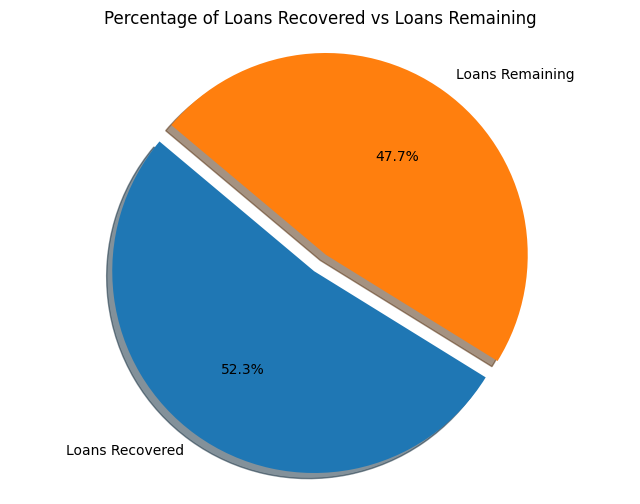

In [218]:
#pie chart preparation
labels = 'Loans Recovered', 'Loans Remaining'
plot = [len(df[loans_recovered]), len(df[loans_not_recovered])]
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 6))
plt.pie(plot, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures pie chart is drawn as a circle

plt.title('Percentage of Loans Recovered vs Loans Remaining')
plt.show()

### Task 2 - Calculating Loss

The company wants to check what percentage of loans have been a loss to the company:
Loans marked as Charged Off in the loan_status column represent a loss to the company.
Calculate the percentage of charged off loans and the total amount that was paid towards these loans before being charged off.

In [153]:
loss_loans = df['loan_status'].str.contains('Charged Off', case=False)
total_loss_loans = len(df[loss_loans])

In [147]:
cols_to_check = ['loan_status', 'total_payment']
df[loss_loans][cols_to_check]

,loan_status,total_payment
7,Charged Off,4182.270000
56,Charged Off,1906.510000
83,Charged Off,282.780000
90,Charged Off,1808.050000
117,Charged Off,1654.140000
...,...,...
54148,Does not meet the credit policy. Status:Charge...,39473.920000
54149,Does not meet the credit policy. Status:Charge...,2042.920000
54152,Charged Off,7294.650000
54156,Charged Off,2580.248838


- Percentage of charged off loans 

In [158]:
loss_loan_prcnt = round((total_loss_loans/total_loans)*100,2)
print(f"The percentage of loans that were losses: {loss_loan_prcnt}%")

The percentage of loans that were losses: 10.72%


- Total sum of payment received to date for the loans before they were charged off

In [159]:
sum_of_payment_rec = round(sum(df[loss_loans]['total_payment']),2)
print(f"Total sum received to date of loans that have been a loss: £{sum_of_payment_rec}")

Total sum received to date of loans that have been a loss: £37670375.31


### Task 3 - Calculating Projected Loss

In [168]:
df[loss_loans].iloc[0:10, 20:40]

,total_accounts,out_prncp,total_payment,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
7,37,0.0,4182.27,2984.92,0.0,0.00,0.0000,2021-08-01,701.95,2021-09-01,2022-01-01,0.0,1,INDIVIDUAL
56,36,0.0,1906.51,1020.99,0.0,0.00,0.0000,2021-08-01,275.29,2021-09-01,2022-01-01,0.0,1,INDIVIDUAL
83,28,0.0,282.78,106.09,0.0,0.00,0.0000,2021-07-01,47.34,2021-08-01,2022-01-01,0.0,1,INDIVIDUAL
90,13,0.0,1808.05,762.85,0.0,0.00,0.0000,2021-07-01,302.85,2021-08-01,2021-12-01,0.0,1,INDIVIDUAL
117,19,0.0,1654.14,139.72,0.0,1192.58,214.6644,2021-03-01,235.83,2021-04-01,2021-08-01,0.0,1,INDIVIDUAL
138,28,0.0,1294.64,238.29,0.0,0.00,0.0000,2021-04-01,435.43,2021-05-01,2022-01-01,0.0,1,INDIVIDUAL
149,22,0.0,4113.33,2010.46,41.0,0.00,0.0000,2021-07-01,861.03,2021-08-01,2021-12-01,0.0,1,INDIVIDUAL
190,31,0.0,1432.79,657.23,0.0,0.00,0.0000,2021-05-01,363.97,2021-06-01,2022-01-01,0.0,1,INDIVIDUAL
209,17,0.0,521.75,183.60,0.0,0.00,0.0000,2021-06-01,104.87,2021-07-01,2021-12-01,0.0,1,INDIVIDUAL
314,8,0.0,2884.14,555.95,0.0,2001.44,360.2592,2021-04-01,302.94,2021-05-01,2021-09-01,0.0,1,INDIVIDUAL


- Creating a copy of only certain columns 
    - We are creating a new dataframe with only certain columns
    - we will use these columns to create new columns for totals

In [204]:
#Columns needed for calculations
cols_to_check = ['int_rate','term','loan_amount','loan_status', 'total_payment']

#Filtering the dataframe based on chosen columns for only the loans marked as 'Charged Off'
loss_df_cols = df[loss_loans][cols_to_check]
loss_df = loss_df_cols.copy()
loss_df.head()

,int_rate,term,loan_amount,loan_status,total_payment
7,19.99,36.0,26500.0,Charged Off,4182.27
56,16.49,60.0,11200.0,Charged Off,1906.51
83,17.14,36.0,1325.0,Charged Off,282.78
90,19.99,36.0,8150.0,Charged Off,1808.05
117,12.99,36.0,7000.0,Charged Off,1654.14


#### Total Expected Amount
    -  Calculating the total expected amount to be received, had all the payments been made
    - Since 'term' is given in months and 'int_rate' is in years
    - we need to work out the 'int_rate' in months 
    - then we can calculate the total expected amount for each loan

- Monthly Interest Rate
    - we will create a new column for the monthly interest rate

In [205]:
loss_df['monthly_int_rate'] = loss_df['int_rate']/12
loss_df.head()

,int_rate,term,loan_amount,loan_status,total_payment,monthly_int_rate
7,19.99,36.0,26500.0,Charged Off,4182.27,1.665833
56,16.49,60.0,11200.0,Charged Off,1906.51,1.374167
83,17.14,36.0,1325.0,Charged Off,282.78,1.428333
90,19.99,36.0,8150.0,Charged Off,1808.05,1.665833
117,12.99,36.0,7000.0,Charged Off,1654.14,1.082500


- Total Expected Amount
    - We can now workout the total expected amount for each loan
    - we need to just multiply the 'monthly_int_rate' by the 'loan_amount'

In [206]:
loss_df['total_expec_full_amount'] = round(loss_df['loan_amount']*loss_df['monthly_int_rate'],2)
loss_df.head()

,int_rate,term,loan_amount,loan_status,total_payment,monthly_int_rate,total_expec_full_amount
7,19.99,36.0,26500.0,Charged Off,4182.27,1.665833,44144.58
56,16.49,60.0,11200.0,Charged Off,1906.51,1.374167,15390.67
83,17.14,36.0,1325.0,Charged Off,282.78,1.428333,1892.54
90,19.99,36.0,8150.0,Charged Off,1808.05,1.665833,13576.54
117,12.99,36.0,7000.0,Charged Off,1654.14,1.082500,7577.50


- Total Expected Loss
    - We can now work out how much loss incurred, given the expected amount
    - This will be there difference between 'total_expec_full_amount' and 'total_payment'

In [207]:
loss_df['total_expected_loss'] = round(loss_df['total_expec_full_amount'] - loss_df['total_payment'], 2)
loss_df.head()

,int_rate,term,loan_amount,loan_status,total_payment,monthly_int_rate,total_expec_full_amount,total_expected_loss
7,19.99,36.0,26500.0,Charged Off,4182.27,1.665833,44144.58,39962.31
56,16.49,60.0,11200.0,Charged Off,1906.51,1.374167,15390.67,13484.16
83,17.14,36.0,1325.0,Charged Off,282.78,1.428333,1892.54,1609.76
90,19.99,36.0,8150.0,Charged Off,1808.05,1.665833,13576.54,11768.49
117,12.99,36.0,7000.0,Charged Off,1654.14,1.082500,7577.50,5923.36


- Total Loss and Percentage Loss

In [275]:
#Sum of total payments received
sum_total_payment_charged_off = sum(loss_df['total_payment'])
#Sum of total expected amount
sum_total_expec_amount_charged_off = sum(loss_df['total_expec_full_amount'])

#Total sum of loss
total_revenue_loss_charged_off = round((sum_total_expec_amount_charged_off - sum_total_payment_charged_off),2)
print(f"The total loss of revenue for loans marked as 'Charged Off': £{total_revenue_loss_charged_off}")

#Percentage Loss 
prcnt_loss_charged_off = round((sum_total_payment_charged_off/sum_total_expec_amount_charged_off)*100,2)
print(f"The total percentage loss of revenue for loans marked as 'Charged Off': {prcnt_loss_charged_off}%")

The total loss of revenue for loans marked as 'Charged Off': £63187971.75
The total percentage loss of revenue for loans marked as 'Charged Off': 37.35%


- Pie Chart

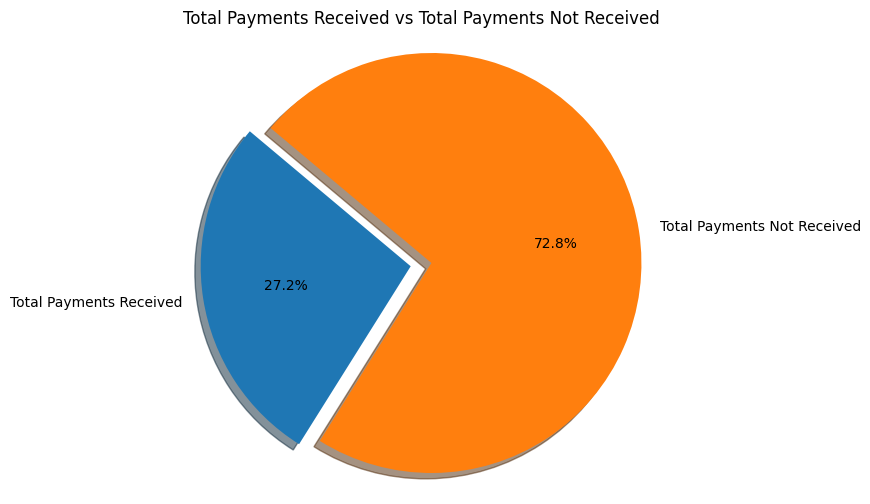

In [223]:
#pie chart preparation
labels = 'Total Payments Received', 'Total Payments Not Received'
plot = [sum_total_payment_charged_off, sum_total_expec_amount_charged_off]
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 6))
plt.pie(plot, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures pie chart is drawn as a circle

plt.title('Total Payments Received vs Total Payments Not Received')
plt.show()

### Task 4 - Possible Loss
- Loans marked as 'Late' come under loans where customers are behind on their payments

#### Late Loans

In [225]:
df['loan_status'].unique()

['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Fully..., 'Does not meet the credit policy. Status:Charg...]
Categories (9, object): ['Charged Off', 'Current', 'Default', 'Does not meet the credit policy. Status:Charg..., ..., 'Fully Paid', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)']

- Total Loans marked as Late

In [241]:
possible_loss_loans = df['loan_status'].str.contains('Late', case=False)
total_possible_loss_loans = len(df[possible_loss_loans]['loan_status'])
print(f"Total number of loans marked as 'Late': {total_possible_loss_loans}")


Total number of loans marked as 'Late': 647


- Total Loans marked as Late as a %

In [242]:
prcnt_possible_loss_loans = round((total_possible_loss_loans / total_loans)*100,2)
print(f"Percentage of loans that are behind on payments: {prcnt_possible_loss_loans}%")

Percentage of loans that are behind on payments: 1.24%


- How much loss the company would incur if their status was changed to 'Charged Off'
    - We will create a new dataframe with all columns required to calculate potential loss for status currently as 'Late'

In [245]:
#Columns needed for calculations
cols_to_check = ['int_rate','term','loan_amount','loan_status', 'total_payment']

#Filtering the dataframe based on chosen columns for only the loans marked as 'Late'
possible_loss_df_cols = df[possible_loss_loans][cols_to_check]
possible_loss_df = possible_loss_df_cols.copy()
possible_loss_df.head()

,int_rate,term,loan_amount,loan_status,total_payment
17,13.660000,60.0,18825.0,Late (31-120 days),3883.91
140,14.990000,36.0,15600.0,Late (31-120 days),5394.11
168,8.670000,36.0,6000.0,Late (31-120 days),1908.02
171,13.507328,36.0,15000.0,Late (31-120 days),3764.14
243,11.440000,36.0,5000.0,Late (16-30 days),1808.96


- Working out monthly Interest Rate
    - we will create a new column for the monthly interest rate

In [246]:
possible_loss_df['monthly_int_rate'] = possible_loss_df['int_rate']/12
possible_loss_df.head()

,int_rate,term,loan_amount,loan_status,total_payment,monthly_int_rate
17,13.660000,60.0,18825.0,Late (31-120 days),3883.91,1.138333
140,14.990000,36.0,15600.0,Late (31-120 days),5394.11,1.249167
168,8.670000,36.0,6000.0,Late (31-120 days),1908.02,0.722500
171,13.507328,36.0,15000.0,Late (31-120 days),3764.14,1.125611
243,11.440000,36.0,5000.0,Late (16-30 days),1808.96,0.953333


- Total Expected Loss if they are changed from 'Late' to 'Charged Off'
    - We will first create a new column to work out the potential Revenue for these columns

In [250]:
#Total Possible Revenue for the loans classed as 'Late' if the loans completed
possible_loss_df['total_expec_full_amount'] = round(possible_loss_df['loan_amount']*possible_loss_df['monthly_int_rate'],2)
possible_loss_df.head()

,int_rate,term,loan_amount,loan_status,total_payment,monthly_int_rate,total_expec_full_amount
17,13.660000,60.0,18825.0,Late (31-120 days),3883.91,1.138333,21429.12
140,14.990000,36.0,15600.0,Late (31-120 days),5394.11,1.249167,19487.00
168,8.670000,36.0,6000.0,Late (31-120 days),1908.02,0.722500,4335.00
171,13.507328,36.0,15000.0,Late (31-120 days),3764.14,1.125611,16884.16
243,11.440000,36.0,5000.0,Late (16-30 days),1808.96,0.953333,4766.67


- We can now work out Possible Loss if the loans' status was changed to 'Charged off'
    - First we work out the sum of the total payments that have been received 
    - Then we will work out the sum of the total expected amount if the loans completed
    - from there we can work out total possible loss if the status changes

In [276]:
#Sum of total payments received
sum_total_payment_late = sum(possible_loss_df['total_payment'])
#Sum of total expected amount
sum_total_expec_amount_late = sum(possible_loss_df['total_expec_full_amount'])

#Total sum of loss
total_revenue_loss_late = round((sum_total_expec_amount_late - sum_total_payment_late),2)
print(f"The total possible loss of revenue for loans marked as 'Late' if their status changed to 'Charged Off': £{total_revenue_loss_late}")

#Percentage Loss 
prcnt_loss_late = round((sum_total_payment_late/sum_total_expec_amount_late)*100,2)
print(f"The total percentage loss of revenue for loans marked as 'Late': {prcnt_loss_late}%")

The total possible loss of revenue for loans marked as 'Late' if their status changed to 'Charged Off': £6951446.85
The total percentage loss of revenue for loans marked as 'Late': 48.67%


#### Default Loans

If customers that are late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?
- We need a total of loans marked as 'Late', 'Charged off' and 'Default'

In [254]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             26222
Current                                                18278
Charged Off                                             5231
Does not meet the credit policy. Status:Fully Paid       962
Late (31-120 days)                                       551
Does not meet the credit policy. Status:Charged Off      343
In Grace Period                                          254
Late (16-30 days)                                         96
Default                                                   49
Name: count, dtype: int64

In [261]:
#Charged Off Loans
print(total_loss_loans)

#Late Loans
print(total_possible_loss_loans)

#Default Loans
default_loans = df['loan_status'].str.contains("Default", case=False)
total_default_loans = len(df[default_loans])
print(total_default_loans)

5574
647
49


- We will work out the expected revenue from the loans marked as 'Default'
    - First we need to create a new dataframe with all loans marked as default

In [267]:
#Columns needed for calculations
cols_to_check = ['int_rate','term','loan_amount','loan_status', 'total_payment']

#Filtering the dataframe based on chosen columns for only the loans marked as 'Late'
default_df_cols = df[default_loans][cols_to_check]
default_df = default_df_cols.copy()
default_df.head()

,int_rate,term,loan_amount,loan_status,total_payment
746,12.99,36.0,8450.0,Default,1980.56
1464,11.44,36.0,6000.0,Default,1397.45
2628,18.54,36.0,21675.0,Default,3852.88
3413,8.67,36.0,35000.0,Default,7828.98
5819,24.50,60.0,35000.0,Default,20384.33


- Total Monthly interest rate for Default Loans

In [268]:
default_df['monthly_int_rate'] = default_df['int_rate']/12
default_df.head()

,int_rate,term,loan_amount,loan_status,total_payment,monthly_int_rate
746,12.99,36.0,8450.0,Default,1980.56,1.082500
1464,11.44,36.0,6000.0,Default,1397.45,0.953333
2628,18.54,36.0,21675.0,Default,3852.88,1.545000
3413,8.67,36.0,35000.0,Default,7828.98,0.722500
5819,24.50,60.0,35000.0,Default,20384.33,2.041667


- Total Expected Loss for Default loans
    - We will first create a new column to work out the potential Revenue for these columns

In [286]:
#Total Possible Revenue for the loans classed as 'Default' 
default_df['total_expec_full_amount'] = round(default_df['loan_amount']*default_df['monthly_int_rate'],2)
default_df.head()

,int_rate,term,loan_amount,loan_status,total_payment,monthly_int_rate,total_expec_full_amount
746,12.99,36.0,8450.0,Default,1980.56,1.082500,9147.12
1464,11.44,36.0,6000.0,Default,1397.45,0.953333,5720.00
2628,18.54,36.0,21675.0,Default,3852.88,1.545000,33487.88
3413,8.67,36.0,35000.0,Default,7828.98,0.722500,25287.50
5819,24.50,60.0,35000.0,Default,20384.33,2.041667,71458.33


- We can now work out Possible Loss of the loans marked as Default
    - First we work out the sum of the total payments that have been received for default 
    - Then we will work out the sum of the total expected amount if the loans completed
    - from there we can work out total possible loss 

In [277]:
#Sum of total payments received
sum_total_payment_default = sum(default_df['total_payment'])
#Sum of total expected amount
sum_total_expec_amount_default = sum(default_df['total_expec_full_amount'])

#Total sum of loss
total_revenue_loss_default = round((sum_total_expec_amount_default - sum_total_payment_default),2)
print(f"The total possible loss of revenue for loans marked as 'Default': £{total_revenue_loss_default}")

#Percentage Loss 
prcnt_loss_default = round((sum_total_payment_default/sum_total_expec_amount_default)*100,2)
print(f"The total percentage loss of revenue for loans marked as 'Default': {prcnt_loss_default}%")

The total possible loss of revenue for loans marked as 'Default': £516586.57
The total percentage loss of revenue for loans marked as 'Default': 47.03%


- Now we can calculate the total expected revenue from loans marked as 'Late', 'Charged Off and 'Default

In [292]:
#Total Revenue Expected for Late
total_revenue_loss_late

#Total Revenue Expected for Charged Off
total_revenue_loss_charged_off

#Total Revenue Expected for Default
total_revenue_loss_default

#Total Expected Revenue for all 3 categories
total_expected_loss_revenue = total_revenue_loss_late + total_revenue_loss_charged_off + total_revenue_loss_default

#### We also need to work out Total Expected Revenue

In [284]:
#Columns needed for calculations
cols_to_check = ['int_rate','term','loan_amount','loan_status', 'total_payment']

#Filtering the dataframe based on chosen columns 
total_revenue_df_cols = df[cols_to_check]
total_revenue_df = total_revenue_df_cols.copy()
total_revenue_df.head()

,int_rate,term,loan_amount,loan_status,total_payment
0,7.49,36.0,8000.0,Current,2982.51
1,6.99,36.0,13200.0,Current,4885.11
2,7.49,36.0,16000.0,Fully Paid,16824.54
3,14.31,36.0,15000.0,Fully Paid,15947.47
4,6.03,36.0,15000.0,Current,5473.46


- Total Monthly interest rate for all Loans

In [285]:
total_revenue_df['monthly_int_rate'] = total_revenue_df['int_rate']/12
total_revenue_df.head()

,int_rate,term,loan_amount,loan_status,total_payment,monthly_int_rate
0,7.49,36.0,8000.0,Current,2982.51,0.624167
1,6.99,36.0,13200.0,Current,4885.11,0.582500
2,7.49,36.0,16000.0,Fully Paid,16824.54,0.624167
3,14.31,36.0,15000.0,Fully Paid,15947.47,1.192500
4,6.03,36.0,15000.0,Current,5473.46,0.502500


- Total expected revenue for all loans

In [287]:
#Total Possible Revenue for the loans classed as 'Default' 
total_revenue_df['total_expec_revenue'] = round(total_revenue_df['loan_amount']*total_revenue_df['monthly_int_rate'],2)
total_revenue_df.head()

,int_rate,term,loan_amount,loan_status,total_payment,monthly_int_rate,total_expec_revenue
0,7.49,36.0,8000.0,Current,2982.51,0.624167,4993.33
1,6.99,36.0,13200.0,Current,4885.11,0.582500,7689.00
2,7.49,36.0,16000.0,Fully Paid,16824.54,0.624167,9986.67
3,14.31,36.0,15000.0,Fully Paid,15947.47,1.192500,17887.50
4,6.03,36.0,15000.0,Current,5473.46,0.502500,7537.50


- Now we can work out total expected revenue

In [291]:
#Sum of total expected revenue
sum_total_expec_revenue = sum(total_revenue_df['total_expec_revenue'])

#### Now we can calculate the percentage of these loans with regards to total expected revenue

In [297]:
prcnt_loss_loans = round((total_expected_loss_revenue/sum_total_expec_revenue)*100,2)
print(f"Total percentage of loans with Default, Charged off and Late as a percentage of total: {prcnt_loss_loans}%")

Total percentage of loans with Default, Charged off and Late as a percentage of total: 8.65%


### Task 5 - Indicators of Loss

- To find some indicators as to what may indicate a customer is not able to pay for the loan, we can compare some columns and see if they have a relationship.
- We want to compare columns for those customers who have already stopped paying and customers who are behind on payments with other columns
- we will look at the 'grade', 'purpose' and 'home_ownership' to see if there any relationship


- Subset of users who have already stopped paying and who are behind on payments

In [329]:
#Charged off Dataframe
charged_off_df = df['loan_status'].str.contains('Charged Off', case=False)
charged_off_df = df[charged_off_df]

#Default Dataframe
default_df = df['loan_status'].str.contains('Default', case=False)
default_df = df[default_df]

#Late Dataframe
late_df = df['loan_status'].str.contains('Late', case=False)
late_df = df[late_df]

- We are testing on the following indicators to see chances of customer not paying their loan:
    - grade
    - purpose
    - home_ownership

- we will use a bar chart to compare the different distributions

In [330]:
import seaborn as sns 
import matplotlib.pyplot as plt

#### Loan Grade

- Bar chart representation for loans with loan_status 'Late', 'Default', 'Charged off'

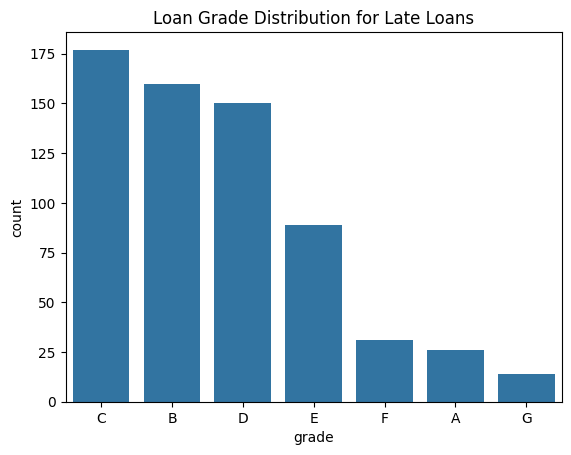

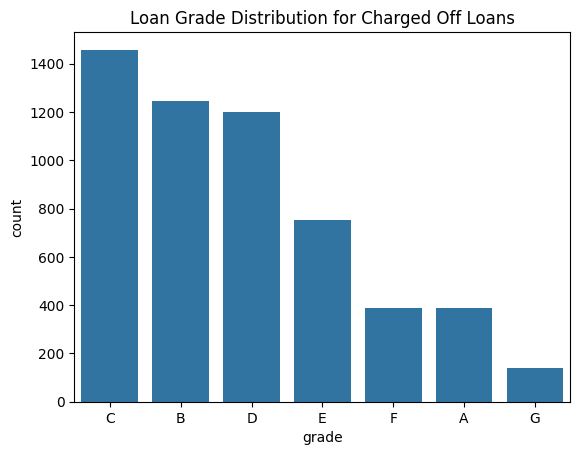

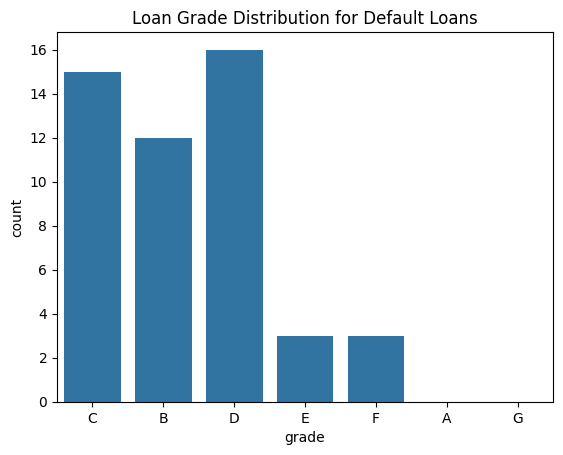

In [357]:
#Bar chart preparation for distribution with 'grade'
x = 'grade'
data = late_df
order = late_df[x].value_counts().index

#Plot Bar chart for late Loans
sns.countplot(x=x, data=late_df, order=order)
plt.title("Loan Grade Distribution for Late Loans")
plt.show()

#Plot Bar chart for charged off Loans
sns.countplot(x=x, data=charged_off_df, order=order)
plt.title("Loan Grade Distribution for Charged Off Loans")
plt.show()

#Plot Bar chart for default Loans
sns.countplot(x=x, data=default_df, order=order)
plt.title("Loan Grade Distribution for Default Loans")
plt.show()



##### Analysis of Grade on Loan:

- From the distribution of all loans, we can see that the loans with loan_status classified as Late, Charged Off and Default has a consistent trend with the loan_grade. 
    - We can see that the grades B,C,D always have the highest count in each of these 3 categories
    - This means loans in this grade are always late, have been classed off as Charged off or end up as default loans
    - These are followed by E and F while Grades A and G have a similar lower count.
    - This shows that the middle ranges of grades between B and F have the highest risk of loans of customers not being able to pay it back.

- Does the grade of the loan have an effect on whether the customer will repay the loan?
    - So the grade does seem to have an effect on whether the customer will repay, as the loans with middle grades between B and D are less likely to pay the loan back.


#### Loan Purpose

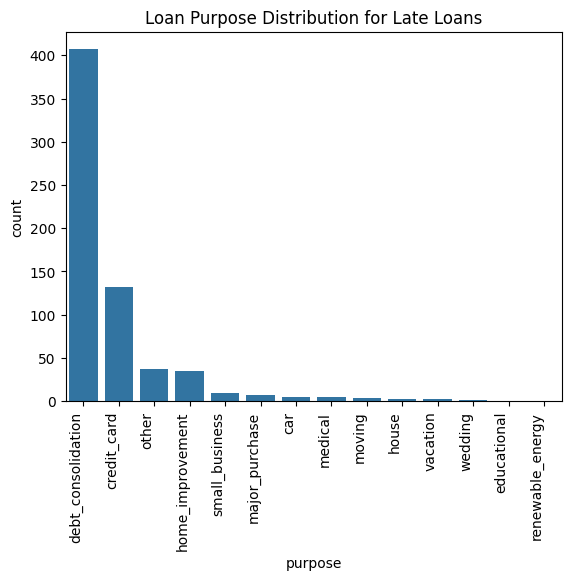

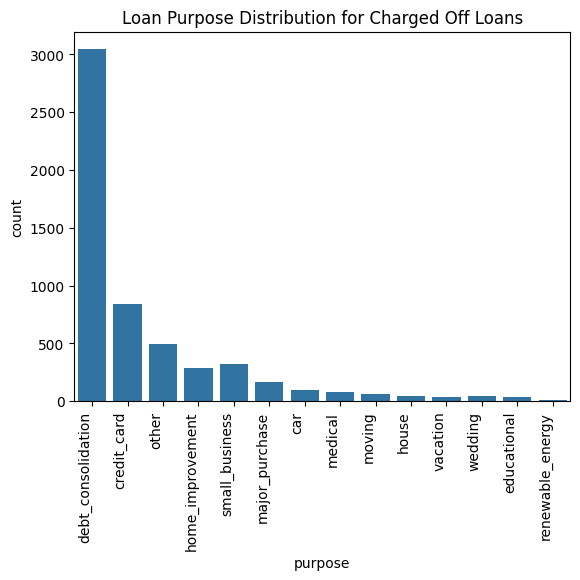

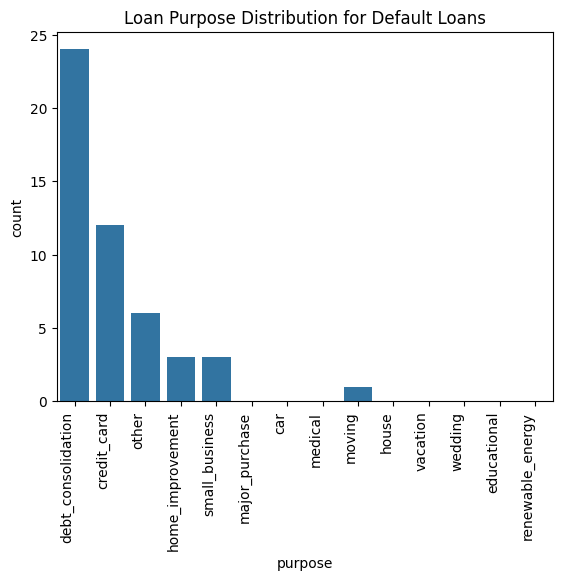

In [360]:
#Bar chart preparation for distribution with 'purpose'
x = 'purpose'
data = late_df
order = late_df[x].value_counts().index

#Plot Bar chart for late Loans
sns.countplot(x=x, data=late_df, order=order)
plt.title("Loan Purpose Distribution for Late Loans")
plt.xticks(rotation=90, ha='right')
plt.show()

#Plot Bar chart for charged off Loans
sns.countplot(x=x, data=charged_off_df, order=order)
plt.title("Loan Purpose Distribution for Charged Off Loans")
plt.xticks(rotation=90, ha='right')
plt.show()

#Plot Bar chart for default Loans
sns.countplot(x=x, data=default_df, order=order)
plt.title("Loan Purpose Distribution for Default Loans")
plt.xticks(rotation=90, ha='right')
plt.show()

##### Analysis of Purpose on Loan:

- From the distribution of all loans, we can see that the loans with loan_status classified as Late, Charged Off and Default has a consistent trend with the loan purpose. 
    - We can see that the 2 main categories are 'debt_consolidation' and 'credit_card' for the purpose of the loan
    - Other purposes can be seen as insignificant.
    - The distribution clearly shows that the purpose of 'debt_consolidation' has by far the highest count in all 3 categories
    - This means loans for this purpose are always late, have been classed off as Charged off or end up as a default loan.
    - This means that 'debt_consolidation' have the highest risk of loans of customers not being able to pay it back.

- Does the Loan Purpose of the loan have an effect on whether the customer will repay the loan?
    - So the purpose does seem to have an effect on whether the customer will repay, as the loans with 'debt_consolidation' purpose are less likely to pay the loan back.


#### Home Ownership

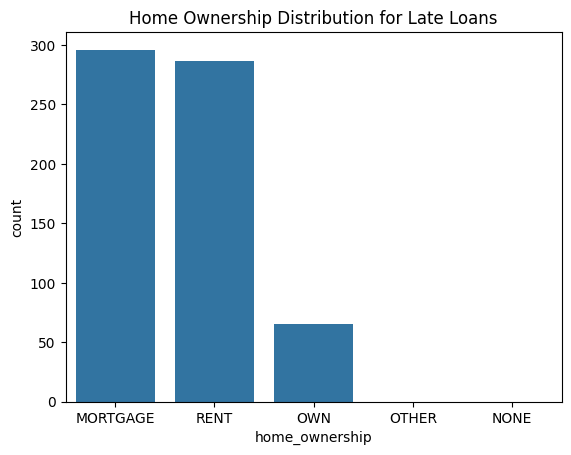

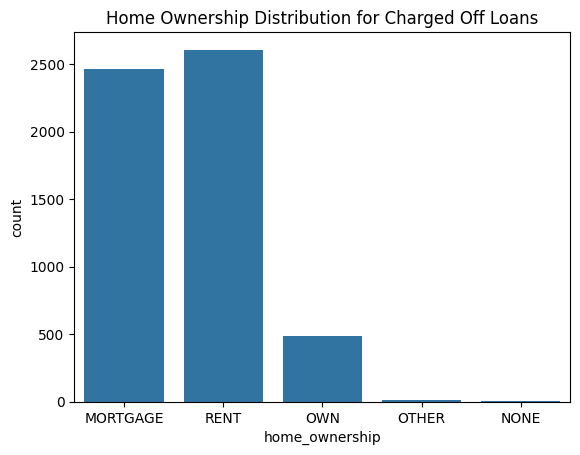

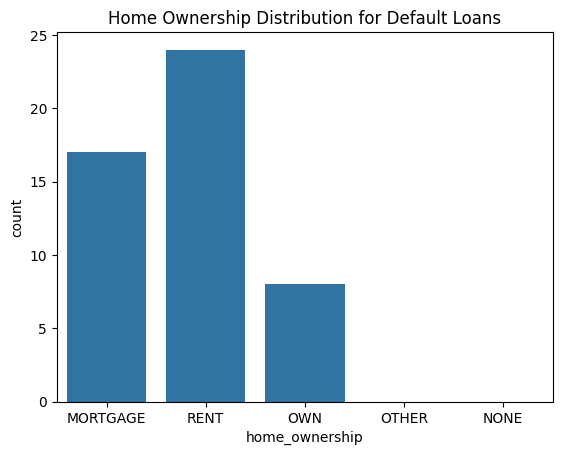

In [354]:
#Bar chart preparation for distribution with 'home_ownership'
x = 'home_ownership'
data = late_df
order = late_df[x].value_counts().index

#Plot Bar chart for late Loans
sns.countplot(x=x, data=late_df, order=order)
plt.title("Home Ownership Distribution for Late Loans")
plt.show()

#Plot Bar chart for charged off Loans
sns.countplot(x=x, data=charged_off_df, order=order)
plt.title("Home Ownership Distribution for Charged Off Loans")
plt.show()

#Plot Bar chart for default Loans
sns.countplot(x=x, data=default_df, order=order)
plt.title("Home Ownership Distribution for Default Loans")
plt.show()

##### Analysis of Home Ownserhip on Loan:

- From the distribution of all loans, we can see that the loans with loan_status classified as Late, Charged Off and Default has a consistent trend with the Home Ownership
    - We can see that the 2 main categories in home ownership are 'mortgage' and 'rent' for home ownership type.
    - The distribution shows that the home ownership type of 'mortgage' and 'rent' have the highest count in all 3 categories
    - This means loans with this home ownership type are always late, have been classed off as Charged off or end up as a default loan.

- Does the Home Ownership type of the loan have an effect on whether the customer will repay the loan?
    - So the Home ownership type does seem to have an effect on whether the customer will repay, as the loans with home ownership type as 'Mortgage' and 'Rent' seem to have the loans with customers who are less likely to pay the loan back.
    - However, since majority of the customers will be of these 2 types, this doesn't give a clear indiciation of the customers that will not be able to pay the loan back, based off home ownership type alone.